# ECSE 415 - Assignment 2
## Caelan Marks - 260744278

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# load image 
img = cv2.imread("book.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# copy image
img_copy = img.copy()

## 1.1 Invariance Under Changes in Scale

In [31]:
# Create scale list
scale_factors = [0.2, 0.5, 0.8, 1.25, 2, 5]

# Create sift object
sift = cv2.xfeatures2d.SIFT_create()

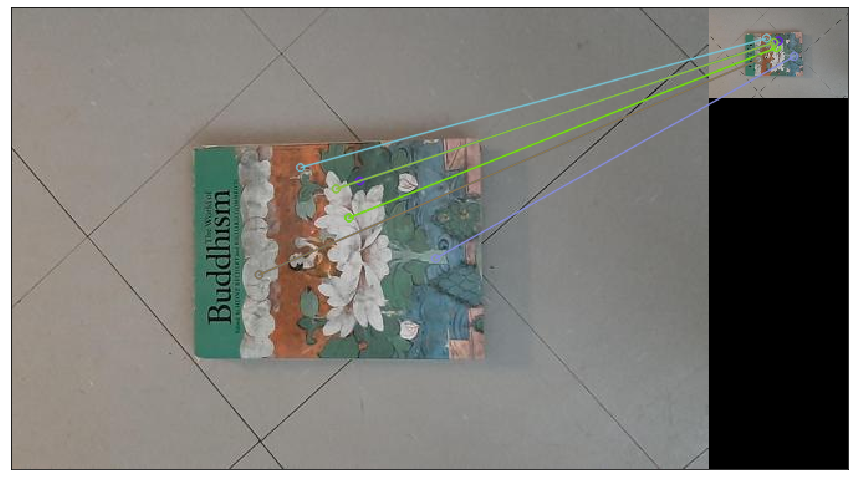

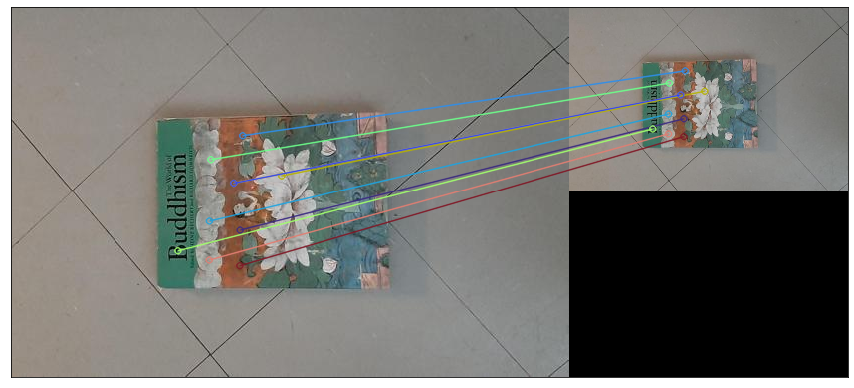

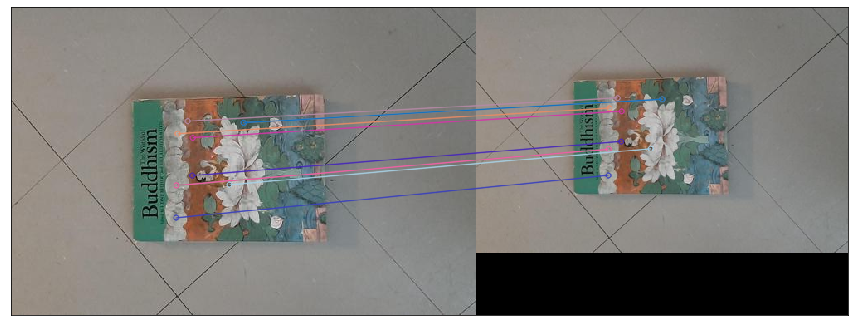

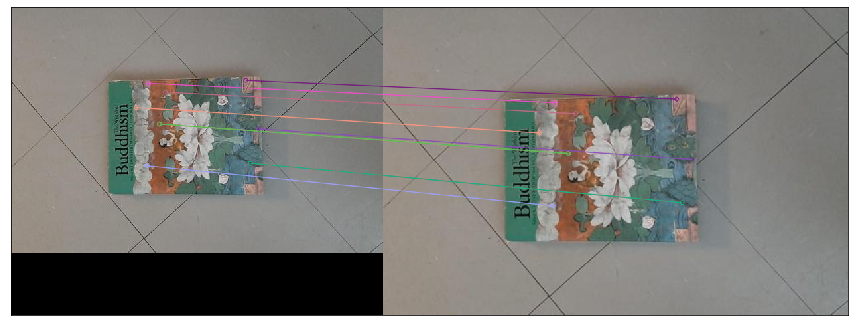

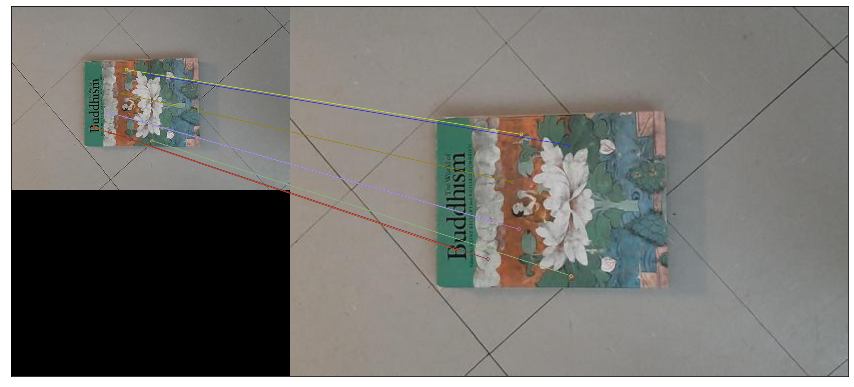

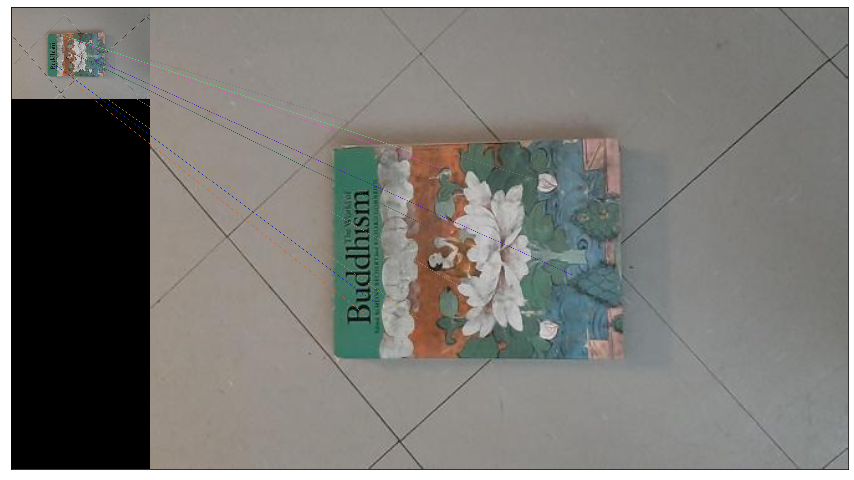

In [32]:
#1.1.1
# Get keypoints and descriptors
original_keypoints, original_descriptors = sift.detectAndCompute(img, None)

# Loop through scale list
match_list = []
for scale in scale_factors:
    #1.1.2
    # Scale the original image
    img_scaled = cv2.resize(img_copy, (int(img_copy.shape[1]*scale), int(img_copy.shape[0]*scale)))
    
    # 1.1.3
    # Get keypoints and descriptors
    scaled_keypoints, scaled_descriptors = sift.detectAndCompute(img_scaled, None)
    
    #1.1.4
    # Match descriptors.
    bf = cv2.BFMatcher()
    matches = bf.match(original_descriptors,scaled_descriptors)
    
    #1.1.5
    # Sort them in the order of their distance.
    match_list.append(sorted(matches, key = lambda x:x.distance))
    
    #1.1.6
    # Draw the top 10 matches
    matched_img = cv2.drawMatches(img,original_keypoints,img_scaled,scaled_keypoints, match_list[-1][:10], None, flags=2)
    
    # Plot images
    plt.figure(figsize=(15,15))
    plt.imshow(matched_img)
    plt.xticks([]), plt.yticks([])
    plt.show()



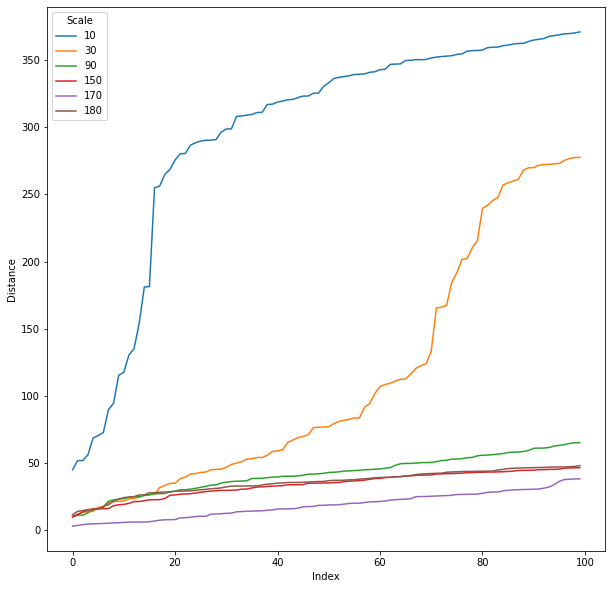

In [33]:
#1.1.7
# Plot graph
plt.figure(figsize=(10,10))

# Only plot first 100 indexes if there are more than 100
if len(matches) > 100:
    upper = 100
else:
    upper = len(matches)

for i in range(len(rotation_factors)):
        plt.plot(range(100), [match.distance for match in match_list[i][:100]], label=str(rotation_factors[i]))

plt.legend(loc='upper left', title="Scale")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

1.1.8

It seems that when the scale is very small, the distance between the matched points is very large. This is likely due to the fact the when we shrink the image, much of the information and corners will be lost. On the other hand once the images become similar size and even as the scaled image gets significantly larger the distance tends to remain relatively constant. This makes sense as SIFT is meant to be a scale invariant algorithm.

## 1.2 Invariance Under Rotation

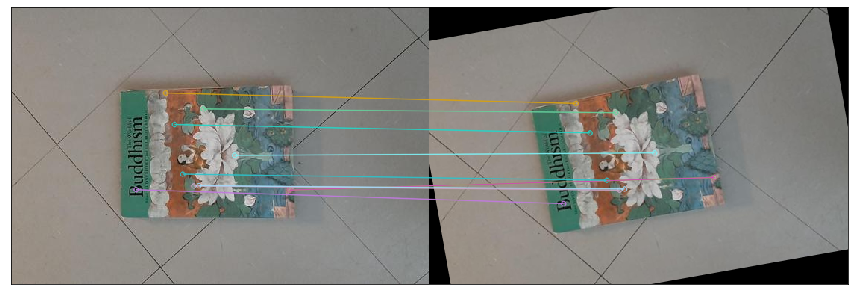

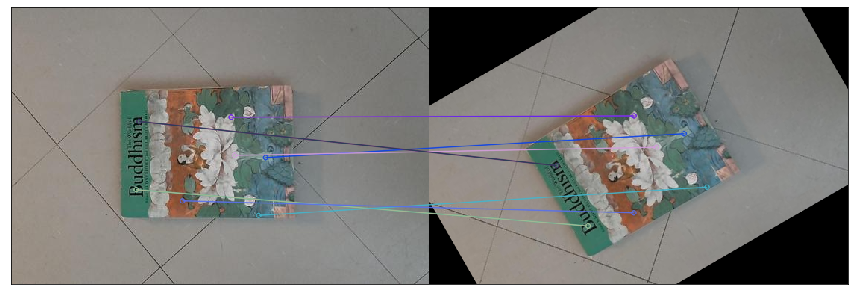

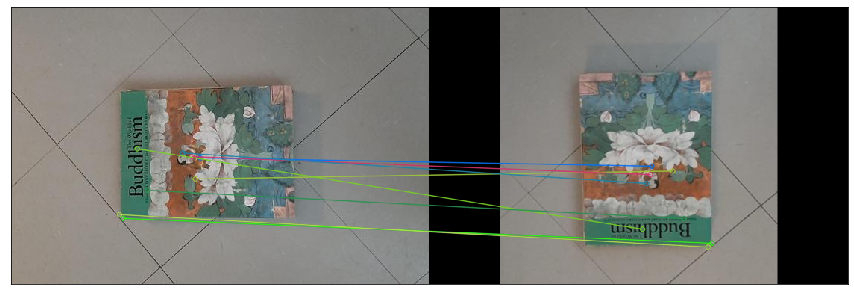

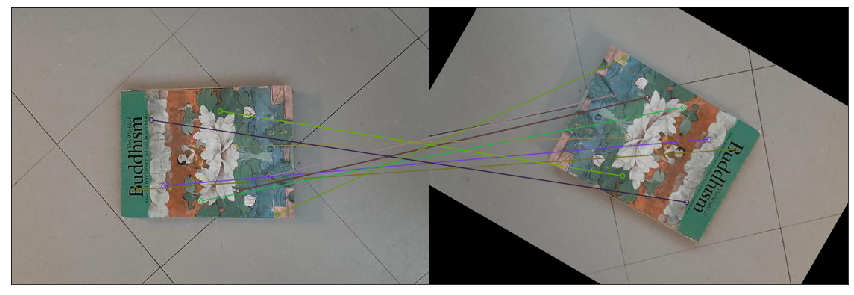

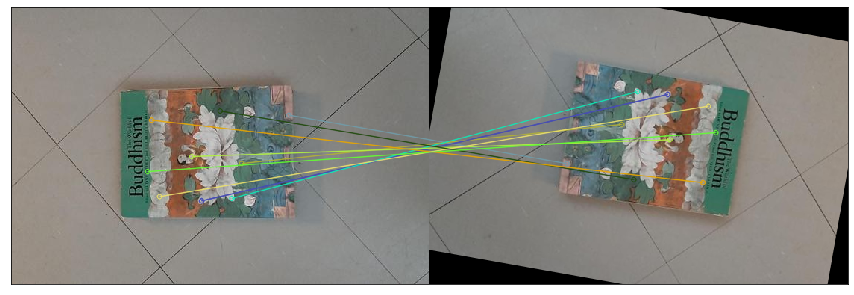

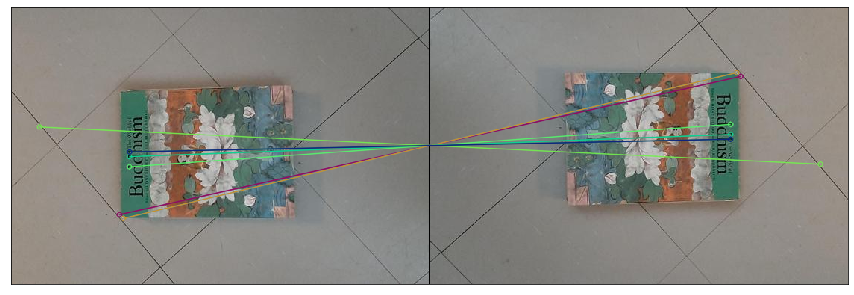

In [34]:
# Create rotation list
rotation_factors = [10, 30, 90, 150, 170, 180]

# Create sift object
sift = cv2.xfeatures2d.SIFT_create()

#1.2.1
# Get keypoints and descriptors
original_keypoints, original_descriptors = sift.detectAndCompute(img, None)

# Loop through rotation list
match_list = []
for rotation in rotation_factors:
    
    #1.2.2
    # Rotate the original image
    M = cv2.getRotationMatrix2D((img_copy.shape[1]/2,img_copy.shape[0]/2),rotation,1)
    # Apply the transformation matrix
    img_rotated = cv2.warpAffine(img_copy,M,(img_copy.shape[1],img_copy.shape[0]))
    
    #1.2.3
    # Get keypoints and descriptors
    rotated_keypoints, rotated_descriptors = sift.detectAndCompute(img_rotated, None)
    
    #1.2.4
    # Match descriptors.
    bf = cv2.BFMatcher()
    matches = bf.match(original_descriptors,rotated_descriptors)
    
    #1.2.5
    # Sort matches in the order of their distance.
    match_list.append(sorted(matches, key = lambda x:x.distance))
    
    #1.2.6
    # Draw the top 10 matches
    matched_img = cv2.drawMatches(img,original_keypoints,img_rotated,rotated_keypoints, match_list[-1][:10], None, flags=2)
    
    # Plot images
    plt.figure(figsize=(15,15))
    plt.imshow(matched_img)
    plt.xticks([]), plt.yticks([])
    plt.show()

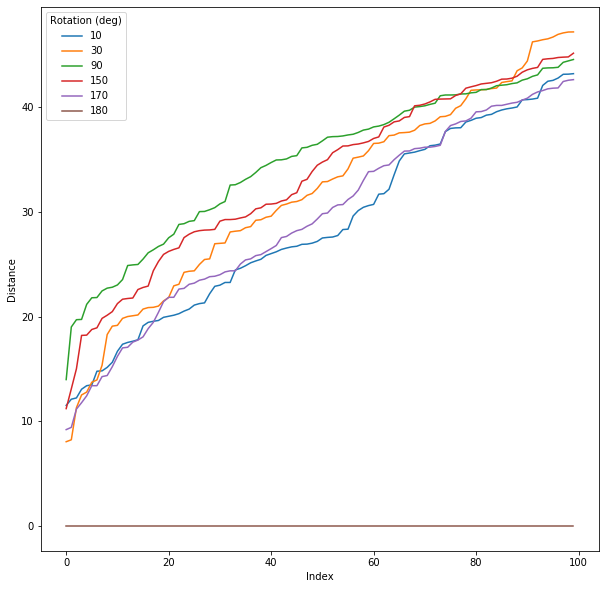

In [35]:
# 1.2.7
# Plot graph
plt.figure(figsize=(10,10))

# Only plot first 100 indexes if there are more than 100
if len(matches) > 100:
    upper = 100
else:
    upper = len(matches)

for i in range(len(rotation_factors)):
        plt.plot(range(100), [match.distance for match in match_list[i][:100]], label=str(rotation_factors[i]))

plt.legend(loc='upper left', title="Rotation (deg)")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

1.2.8

For the image rotation, the distance between the points stays constant the entire time except when the rotation reaches 180 degrees at which point the distance between the matched points becomes 0. This is expected because SIFT features remain relatively constant when rotated, although the interpolation may cause some differences. For the image rotated 180 degrees, since there is no interpolation the matched points are identical and the distance is 0.